# import 

In [1]:
import numpy as np  
import sklearn 
import math
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# import 

In [3]:


def target_function(x):
    return -5 + 20 * x - 16 * x ** 2


def gene_dataset():
    dataset_size = 30
    np.random.seed(2021)
    data_x = np.random.uniform(0, 1, dataset_size)
    data_epsilon = np.random.normal(0, 1, dataset_size)
    data_y = target_function(data_x) + data_epsilon * 2 / 5
    return data_x, data_y


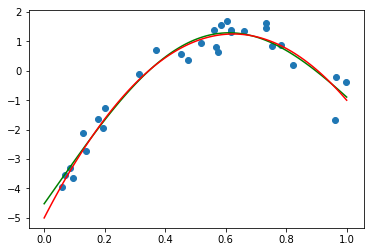

In [6]:
class KernelRidge:
    def __init__(self, x, y, lam, kernel_function):
        self.x, self.kernel_function = x, kernel_function
        
        y_t = np.mat(y) # (1,N )
        #print ( "y_t ", y_t.shape )
          
        dataset_size = len(x)
        lam_i = lam * np.mat(np.identity(dataset_size))# (N,N)
        #print ( "lam_i ", lam_i.shape )
        #print (lam_i   )
          
        k = np.mat(np.zeros((dataset_size, dataset_size))) # K=(N,N)
        for i in range(0, dataset_size):
            for j in range(0, dataset_size):
                k[i, j] = kernel_function(x[i], x[j])

        self.coefficient_vec = 2 * y_t * np.linalg.inv(lam_i + 2 * k)
        #print ( "self.coefficient_vec ", self.coefficient_vec.shape ) # (1,30 )
          
    def predict(self, x):
        prediction_y = np.zeros(len(x)) 
        #print ( x.shape  )
          
        for i in range(0, len(x)):
            #print ( i )
              
            kappa = np.mat(np.zeros(len(self.x))).T # (N,1 ) [k(x1,x),k(x2,x),...,k(xN,x)]
            #print ( "kappa ",kappa.shape ,len(self.x)  )
              
            for j in range(0, len(self.x)):
                #print ( self.x[j]  )
                #print ( x[i]) 
                #adfasdf  
                kappa[j, 0] = self.kernel_function(self.x[j], x[i])
            prediction_y[i] = self.coefficient_vec * kappa
        return prediction_y

def kernel0(x, y):
    return 1 + x * y


def kernel1(x, y):
    return (1 + x * y) ** 2


def kernel2(x, y):
    return (1 + x * y) ** 9


def kernel3(x, y):
    return min(x, y)

def kernel4(x, y):
    return math.exp(-(x - y) ** 2)

def main():
    x, y = gene_dataset()
    
    kernel_ridge = KernelRidge(x, y, 0.01, kernel4)

    x_prediction = np.linspace(0, 1, 100)
    
    y_prediction = kernel_ridge.predict(x_prediction)

    plt.scatter(x, y)
    plt.plot(x_prediction, y_prediction, 'g')
    plt.plot(x_prediction, target_function(x_prediction), 'r')
    plt.show()
main(  )

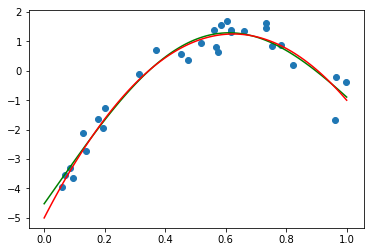

In [7]:
x, y = gene_dataset()